1. <a id='import_libs'>Import libraries</a>

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.  <a id='loaddataset'>Load Datasets</a>

In [2]:
codecsa = pd.read_csv("Infinity_XP.csv",header=None,sep=';',names=['Set','Valor','Data'])
codecsa['Data'] = pd.to_datetime(codecsa['Data'], format="%d/%m/%Y %H:%M")
codecsa['Dia'] = pd.DatetimeIndex(codecsa['Data']).day
codecsa['Mes'] = pd.DatetimeIndex(codecsa['Data']).month
codecsa['Ano'] = pd.DatetimeIndex(codecsa['Data']).year
codecsa['Weekday'] = pd.DatetimeIndex(codecsa['Data']).weekday
codecsa['GainLoss'] = np.where(codecsa['Valor']>=0, 'Gain', 'Loss')
#codecsa.head(30)

dfcalendar = pd.read_csv("Calendario.csv",header=None,sep=';',names=['Dia','Mes','Ano','Payroll','Feriado USA','Venc Opção','Venc Índice'])
dfcalendar['Combined'] = dfcalendar['Dia'].map(str) + "-" +dfcalendar['Mes'].map(str) + "-" + dfcalendar['Ano'].map(str)

3. <a id='resultadoconsolidado'>Resultado consolidado por set<a/>

In [3]:
subcodecsa = codecsa[['Set','Valor']]
dfgpby = subcodecsa.groupby(['Set']).sum()
dfgpby['Nr Trades'] = subcodecsa.groupby(['Set']).count()
dfgpby['Nr Trades Gain'] = subcodecsa[subcodecsa['Valor'] > 0].groupby(['Set']).count()
dfgpby['$ Trades Gain'] = subcodecsa[subcodecsa['Valor'] > 0].groupby(['Set']).sum()
dfgpby['Nr Trades Loss'] = subcodecsa[subcodecsa['Valor'] <= 0].groupby(['Set']).count()
dfgpby['$ Trades Loss'] = subcodecsa[subcodecsa['Valor'] < 0].groupby(['Set']).sum()
dfgpby['% Trades Gain'] = dfgpby['Nr Trades Gain'] / dfgpby['Nr Trades']
dfgpby['% Acerto'] = dfgpby['Nr Trades Gain'] / dfgpby['Nr Trades Loss']
dfgpby['Media $$'] = subcodecsa.groupby(['Set']).mean()
dfgpby['Valor Max'] = subcodecsa.groupby(['Set']).max()
dfgpby['Valor Min'] = subcodecsa.groupby(['Set']).min()
dfgpby.sort_values(['Valor'],ascending=False)

,Valor,Nr Trades,Nr Trades Gain,$ Trades Gain,Nr Trades Loss,$ Trades Loss,% Trades Gain,% Acerto,Media $$,Valor Max,Valor Min
Set,,,,,,,,,,,
I-MERCEDES,1432,31,19,2449,12,-1017,0.612903,1.583333,46.193548,252,-116
I-FERRARI,1115,27,16,2389,11,-1274,0.592593,1.454545,41.296296,325,-153
I-RANGE_ROVER,1104,10,9,1284,1,-180,0.900000,9.000000,110.400000,264,-180
I-JAGUAR,969,51,32,2463,19,-1494,0.627451,1.684211,19.000000,151,-116
I-TOYOTA,662,55,30,3223,25,-2561,0.545455,1.200000,12.036364,277,-157
I-VOLVO,189,31,19,1429,12,-1240,0.612903,1.583333,6.096774,218,-137
I-BMW_X5,-128,33,27,555,6,-683,0.818182,4.500000,-3.878788,127,-151
I-PORSCHE,-145,34,14,1449,20,-1594,0.411765,0.700000,-4.264706,195,-128


3. <a id='resultadomensal'>Resultado mensal por set<a/>

In [4]:
subcodecsa1 = codecsa[['Set','Valor','Mes']]
codecsa3 = subcodecsa1.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
codecsa3.columns = ['Agosto','Setembro','Outubro']

codecsa3soma = [[codecsa3.Agosto.sum(),codecsa3.Setembro.sum(),codecsa3.Outubro.sum()]]
codecsa3soma1 = pd.DataFrame(codecsa3soma, columns=['Agosto','Setembro','Outubro'])

codecsa22 = codecsa3.append(codecsa3soma1, sort=False)
codecsa22['Total Linha'] = codecsa22.sum(axis=1)
codecsa22.head(50)

,Agosto,Setembro,Outubro,Total Linha
I-BMW_X5,0,0,-128,-128
I-FERRARI,39,967,109,1115
I-JAGUAR,1127,-41,-117,969
I-MERCEDES,138,1102,192,1432
I-PORSCHE,84,-125,-104,-145
I-RANGE_ROVER,733,465,-94,1104
I-TOYOTA,104,663,-105,662
I-VOLVO,-90,-87,366,189
0,2135,2944,119,5198


4. <a id='resultadosemanal'>Resultado semanal por set<a/>

In [5]:
subcodecsa1 = codecsa[['Set','Valor','Weekday']]
codecsa3 = subcodecsa1.groupby(['Set','Weekday'])['Valor'].sum().unstack(fill_value = 0)
codecsa3.columns = ['Segunda','Terça','Quarta','Quinta','Sexta']

codecsa3soma = [[codecsa3.Segunda.sum(),codecsa3.Terça.sum(),codecsa3.Quarta.sum(),codecsa3.Quinta.sum(),codecsa3.Sexta.sum()]]
codecsa3soma1 = pd.DataFrame(codecsa3soma, columns=['Segunda','Terça','Quarta','Quinta','Sexta'])

codecsa33 = codecsa3.append(codecsa3soma1, sort=False)
codecsa33['Total Linha'] = codecsa33.sum(axis=1)
codecsa33.head(50)

,Segunda,Terça,Quarta,Quinta,Sexta,Total Linha
I-BMW_X5,118,19,-9,-259,3,-128
I-FERRARI,299,20,-13,631,178,1115
I-JAGUAR,-167,440,264,357,75,969
I-MERCEDES,163,0,73,1196,0,1432
I-PORSCHE,349,-356,-393,345,-90,-145
I-RANGE_ROVER,42,616,31,189,226,1104
I-TOYOTA,-444,403,257,49,397,662
I-VOLVO,79,-220,69,198,63,189
0,439,922,279,2706,852,5198


<a id='estudoI-FERRARI'>Estudo do Set = I-FERRARI<a/> - <a href='#home'>Home<a/>

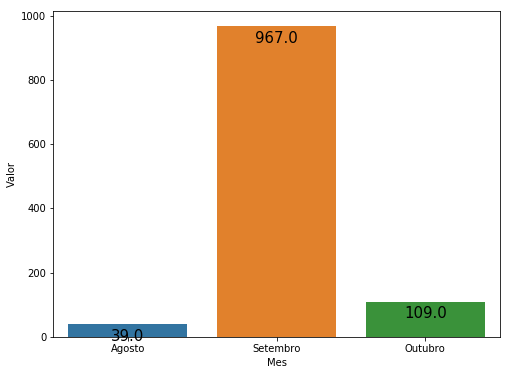

In [6]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-FERRARI')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


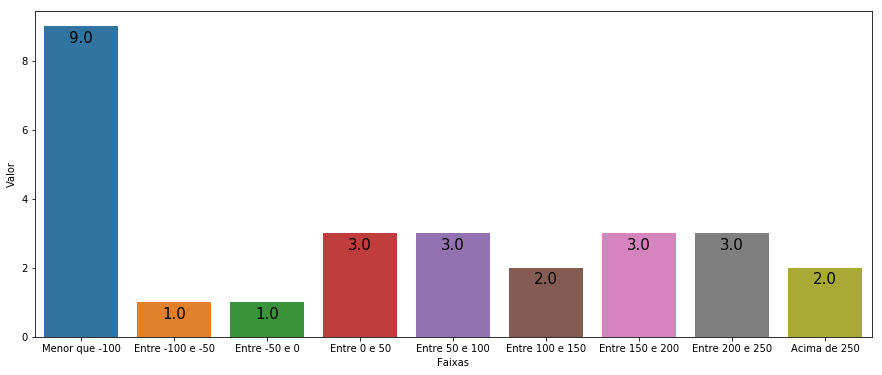

In [7]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-FERRARI')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4107AEE48>],
      dtype=object)

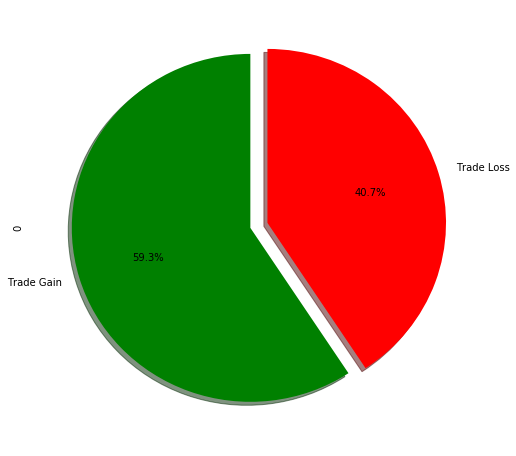

In [8]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-FERRARI')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-JAGUAR'>Estudo do Set = I-JAGUAR<a/> - <a href='#home'>Home<a/>

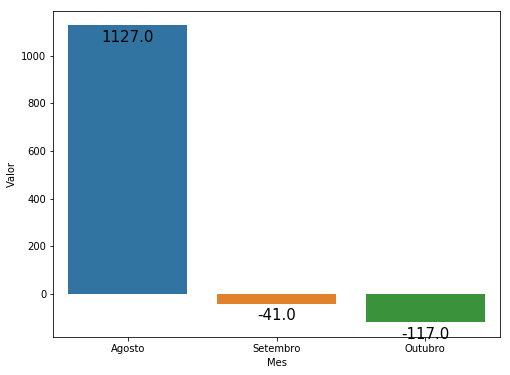

In [9]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-JAGUAR')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


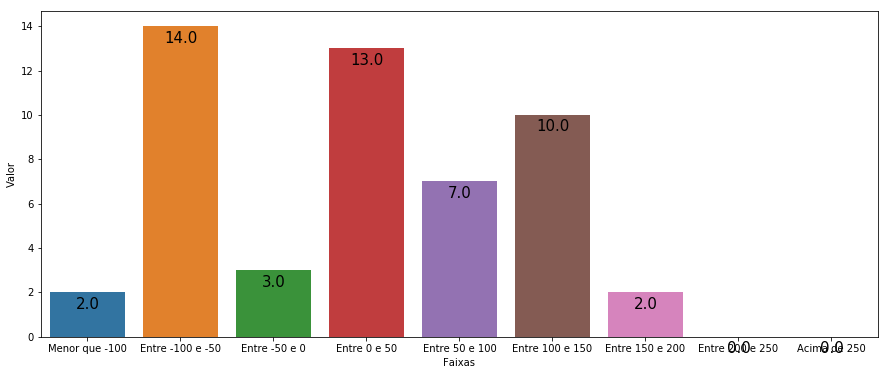

In [10]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-JAGUAR')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C410AAB7F0>],
      dtype=object)

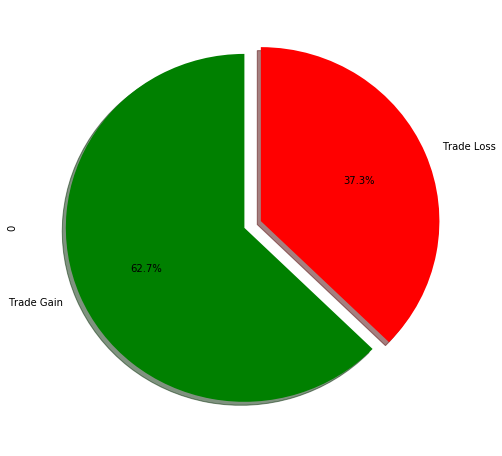

In [11]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-JAGUAR')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-MERCEDES'>Estudo do Set = I-MERCEDES<a/> - <a href='#home'>Home<a/>

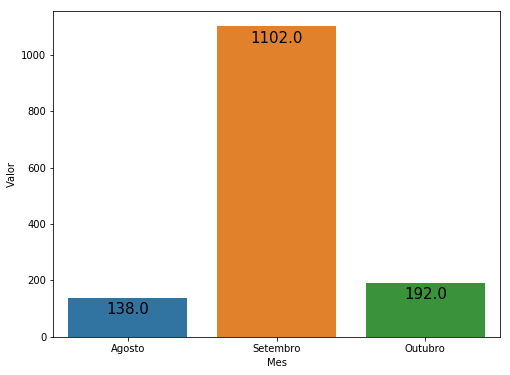

In [12]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-MERCEDES')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


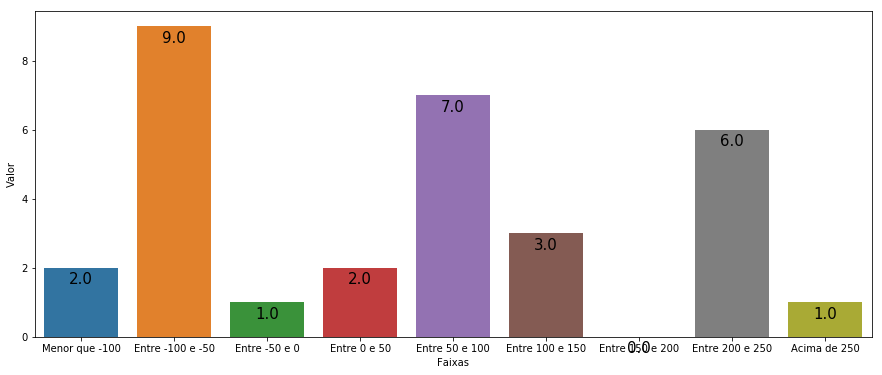

In [13]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-MERCEDES')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C413CD6588>],
      dtype=object)

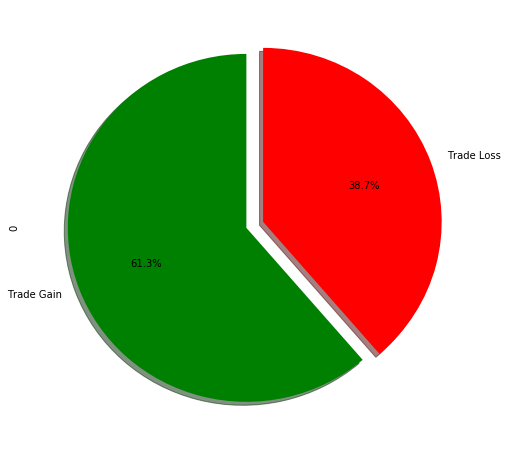

In [14]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-MERCEDES')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-RANGE_ROVER'>Estudo do Set = I-RANGE_ROVER<a/> - <a href='#home'>Home<a/>

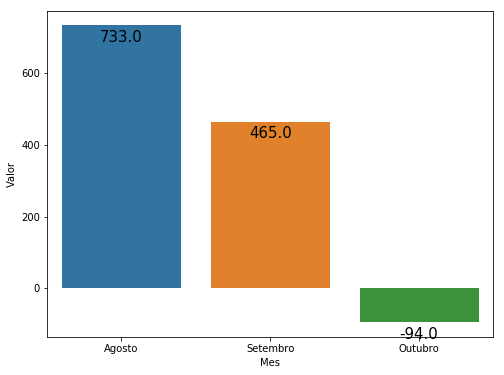

In [16]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RANGE_ROVER')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


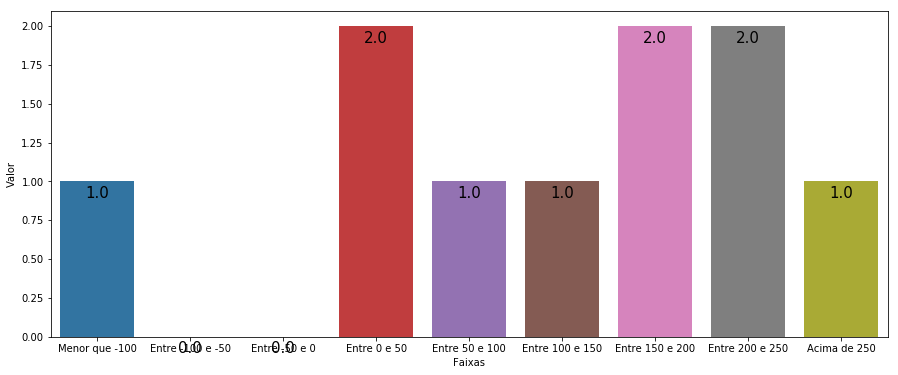

In [17]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-RANGE_ROVER')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4105B6828>],
      dtype=object)

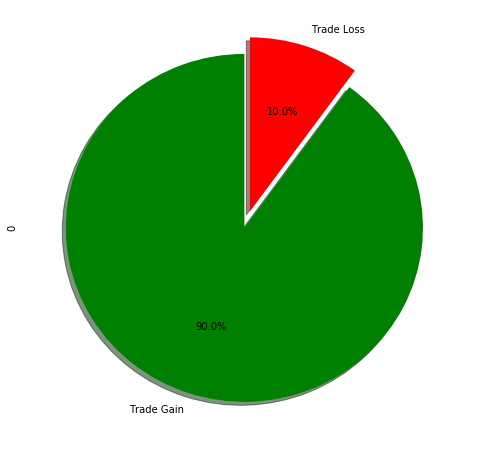

In [18]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-RANGE_ROVER')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-TOYOTA'>Estudo do Set = I-TOYOTA<a/> - <a href='#home'>Home<a/>

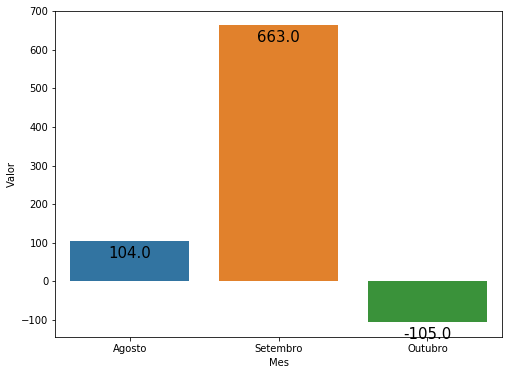

In [20]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TOYOTA')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


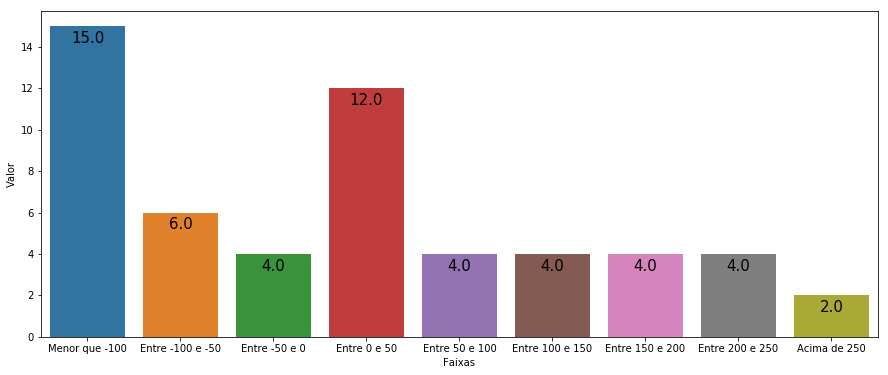

In [21]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-TOYOTA')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4109275F8>],
      dtype=object)

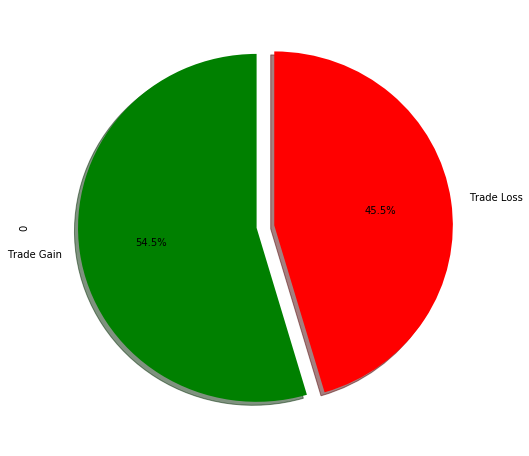

In [22]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-TOYOTA')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)

<a id='estudoI-VOLVO'>Estudo do Set = I-VOLVO<a/> - <a href='#home'>Home<a/>

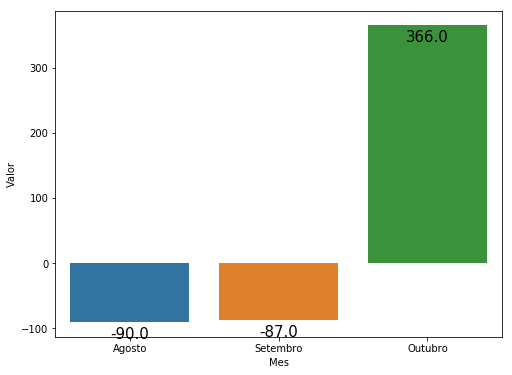

In [23]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-VOLVO')]
subcodecsaCMM4 = subcodecsa2.groupby(['Set','Mes'])['Valor'].sum().unstack(fill_value = 0)
#subcodecsaCMM4.head()

Mes = ["Agosto","Setembro","Outubro"]
Valor = [subcodecsaCMM4[8].values[0],
         subcodecsaCMM4[9].values[0],
         subcodecsaCMM4[10].values[0]]
df = pd.DataFrame({"Mes":Mes, "Valor":Valor})
plt.figure(figsize=(8,6))
splot = sns.barplot(x="Mes", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')


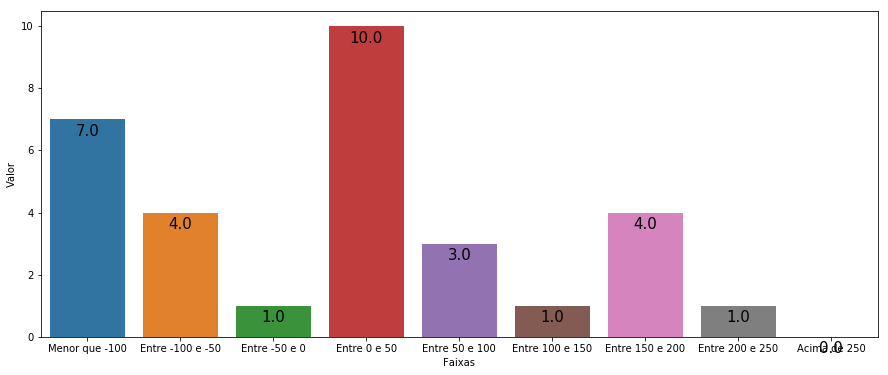

In [24]:
subcodecsaAA = codecsa[codecsa['Set'] == ('I-VOLVO')]
subcodecsam100 = subcodecsaAA[(subcodecsaAA['Valor'] < -100)].count()[0]
subcodecsam50am100 = subcodecsaAA[(subcodecsaAA['Valor'] > -100) & (subcodecsaAA['Valor'] <= -50)].count()[0]
subcodecsa0am50 = subcodecsaAA[(subcodecsaAA['Valor'] > -50) & (subcodecsaAA['Valor'] <= 0)].count()[0]
subcodecsa0a50 = subcodecsaAA[(subcodecsaAA['Valor'] > 0) & (subcodecsaAA['Valor'] <= 50)].count()[0]
subcodecsa50a100 = subcodecsaAA[(subcodecsaAA['Valor'] > 50) & (subcodecsaAA['Valor'] <= 100)].count()[0]
subcodecsa100a150 = subcodecsaAA[(subcodecsaAA['Valor'] > 100) & (subcodecsaAA['Valor'] <= 150)].count()[0]
subcodecsa150a200 = subcodecsaAA[(subcodecsaAA['Valor'] > 150) & (subcodecsaAA['Valor'] <= 200)].count()[0]
subcodecsa200a250 = subcodecsaAA[(subcodecsaAA['Valor'] > 200) & (subcodecsaAA['Valor'] <= 250)].count()[0]
subcodecsa250mais = subcodecsaAA[(subcodecsaAA['Valor'] > 250)].count()[0]

Faixas = ['Menor que -100','Entre -100 e -50','Entre -50 e 0','Entre 0 e 50','Entre 50 e 100',
                             'Entre 100 e 150','Entre 150 e 200','Entre 200 e 250','Acima de 250']
Valor = [subcodecsam100,subcodecsam50am100,subcodecsa0am50,subcodecsa0a50,subcodecsa50a100,subcodecsa100a150,
         subcodecsa150a200,subcodecsa200a250,subcodecsa250mais]
df = pd.DataFrame({"Faixas":Faixas, "Valor":Valor})
plt.figure(figsize=(15,6))
splot = sns.barplot(x="Faixas", y="Valor", data=df)
for p in splot.patches: splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', size=15, xytext = (0, -12), textcoords = 'offset points')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4140D4438>],
      dtype=object)

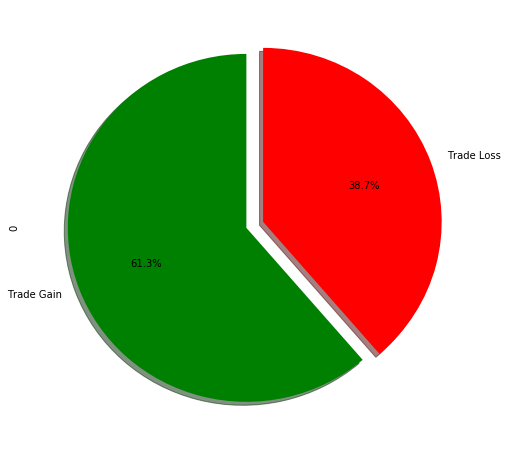

In [25]:
subcodecsa2 = codecsa[codecsa['Set'] == ('I-VOLVO')]
TradeGain = subcodecsa2[subcodecsa2['Valor'] > 0].count()[0]
TradeLoss = subcodecsa2[subcodecsa2['Valor'] < 0].count()[0]
colors = ['green','red']
df = pd.DataFrame([TradeGain,TradeLoss], index=['Trade Gain', 'Trade Loss'])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%', startangle=90, shadow=True, explode=(0, 0.1),
        legend=False,colors=colors)